In [1]:
import scipy.io
import numpy as np
import pandas as pd

!pip install opencv-python
import cv2

import glob

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# Import classifiers
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
# metrics contain our plot_confustion_matrix and classification_report
from sklearn import metrics

# Helper fuction to splitting data
from sklearn.model_selection import train_test_split



In [2]:
#load final df

happy_sad = pd.read_csv('happy_sad_DF.csv')

happy_sad.head()

,expressions,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,happiness,46,40,42,49,46,34,29,33,31,...,51,53,57,62,66,69,66,64,60,56
1,sadness,11,11,37,1,12,27,32,35,44,...,31,33,17,17,18,24,10,13,18,23
2,happiness,158,158,158,158,161,164,168,170,171,...,16,17,19,20,22,22,25,26,27,28
3,happiness,52,59,67,72,75,78,83,88,92,...,15,17,19,18,14,9,6,4,3,2
4,sadness,15,20,26,29,29,34,46,59,68,...,30,28,29,34,34,32,32,36,41,45


In [3]:
def build_and_eval_model(model,df,name,  random_state= 23):
    print("Running report for model:", model , 'and DF:' , name)
   
    selected_features = df.columns
    # print(type(selected_features)) = <class 'pandas.core.indexes.base.Index'>
    selected_features = list(selected_features) # a list of all the cols

    #remove the file_name and the expressions col (our y value)
    selected_features.remove('expressions')
    # selected_features #0-999 pixels of the image
    
    
    X = df[selected_features]
    y = df['expressions']
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state)    
    
    #Normalize pixels 
    X_train = X_train / 255 #v important yeeee 
    X_test = X_test / 255
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy , 'for model: ' , model)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
    title = 'confusion matrix for model: '+ str(model)
       
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(13,13))
    label_font = {'size':'21'}
    plt.title(title)
    plt.rcParams.update({'font.size': 19})
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test, 
                                  y_true=y_test, 
                                  ax=ax,
                                  cmap="OrRd"
                                 )
    

    # Return the fitted model. 
    return model

In [4]:
lr = LogisticRegression()

Running report for model: LogisticRegression() and DF: Happy vs Sad DF


/Users/marinmayaazhar/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.834432 for model:  LogisticRegression()
              precision    recall  f1-score   support

   happiness       0.86      0.85      0.85       765
     sadness       0.81      0.82      0.81       600

    accuracy                           0.83      1365
   macro avg       0.83      0.83      0.83      1365
weighted avg       0.83      0.83      0.83      1365



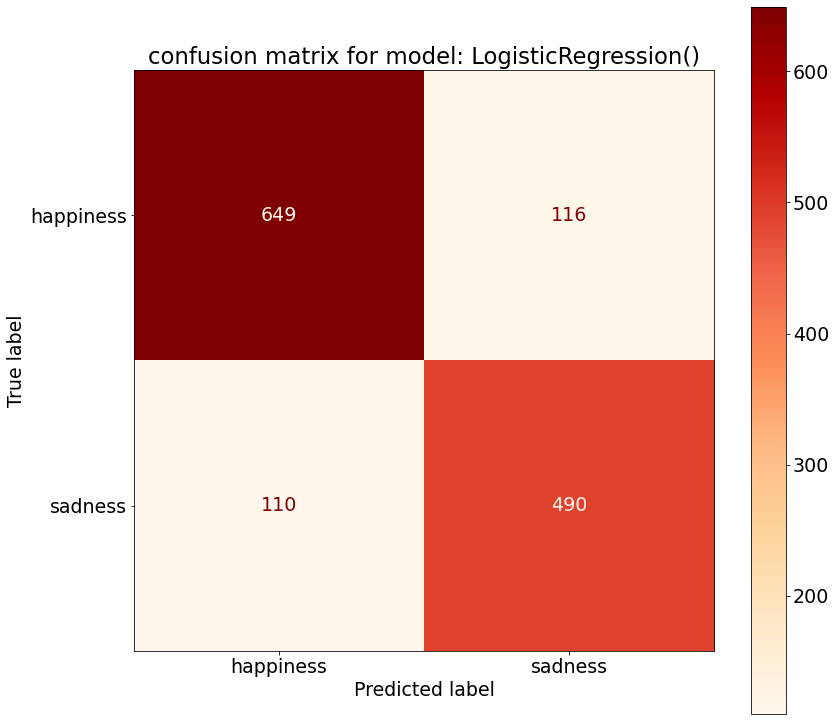

In [7]:
model =  build_and_eval_model(lr, happy_sad, "Happy vs Sad DF")

In [8]:
import pickle 

pickle.dump(model, open('model_lr.sav','wb'))

In [9]:
#the final model

lr_model  = pickle.load(open('model_lr.sav', 'rb'))

LogisticRegression()

In [ ]:
#importing images with glob 
#pip install opencv-python

import cv2
import glob

def get_images_from_folder(imdir):
    ext = ['png', 'jpg', 'gif']    # Add image formats here

    files = []
    [files.extend(glob.glob(imdir + '*.' + e)) for e in ext] #arbitrary ordering of files 
    files = sorted(files) # to get back file ordering
    images = [cv2.imread(file) for file in files]

    return images

In [93]:
# do the bottom two if u dont have it installed
#!pip install cmake  
#!pip install dlib

import dlib
from PIL import Image
from skimage import io
import matplotlib.pyplot as plt


def detect_faces(image):

    # Create a face detector
    face_detector = dlib.get_frontal_face_detector()

    # Run detector and get bounding boxes of the faces on image.
    detected_faces = face_detector(image, 1)
    face_frames = [(x.left(), x.top(),
                    x.right(), x.bottom()) for x in detected_faces]

    return face_frames


#enter the path of the image to get a list faces from a image (size 100x100)
#USE IF U HAVE A PNG/JPEG ETC IMAGE


def facelist(path):
    
    # Load image
    img_path = path
    image = io.imread(img_path)

    # Detect faces
    detected_faces = detect_faces(image)

    #create a list of n faces to store 
    list_of_faces =[]

    # Crop faces and plot and resize 
    newsize = (100,100)
    for n, face_rect in enumerate(detected_faces):
        face = Image.fromarray(image).crop(face_rect)
    
        #plt.subplot(1, len(detected_faces), n+1)
        #plt.axis('off')
        #plt.imshow(face)
        list_of_faces.append(face.resize(newsize))
    return list_of_faces


    

In [ ]:


#list_of_faces2 = facelist('opencv_frame_1.png')

numpy.ndarray

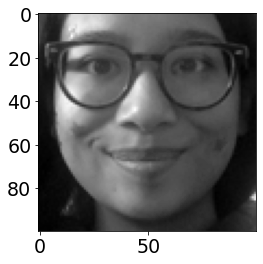

In [33]:
list_of_faces2 = facelist('opencv_frame_1.png') #happy face

list_of_faces2[0]

type(list_of_faces2[0])


images2 = np.array(list_of_faces2[0])

images2

images2 = cv2.cvtColor(images2, cv2.COLOR_BGR2GRAY)


plt.imshow(images2, cmap = 'gray') 

type(images2)

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#this function turns images into gray scale and makes it into a df

def X(faces):
    #convert from bgr to gray scale
    images =[]
    
    if(type(faces) != 'numpy.ndarray'):
        for face in faces: 
            images.append(np.array(face))
  
    #if it is a numpy array type 
    else:  
        images = faces 
        
    images_gray = [cv2.cvtColor(images[i], cv2.COLOR_BGR2GRAY) for i in range(len(images)) ]
    #convert from a 100x100 to a 1D row of 1000 cols
    flatten_gray = [images_gray[i].flatten() for i in range(len(images_gray))]
    #create into a df of flatten images 
    flatten_df = pd.DataFrame(flatten_gray)
    
    return flatten_df


X(list_of_faces2)
    

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,86,82,80,77,65,56,66,65,61,64,...,51,54,57,59,61,63,64,67,74,78


In [62]:
Y = lr_model.predict_proba(X(list_of_faces2))

Y2 = lr_model.predict(X(list_of_faces2))
print('Predicted Probabilities: %s' % Y)
print('Predicted Class: %s' % Y2)



proba_happy =[]
proba_sad =[]

#this will create a list of predictive probabities for happy and sad
for i in range(len(Y)):
    proba_happy.append("{:.3f}".format(Y[i][0]))
    proba_sad.append("{:.3f}".format(Y[i][1]))


def whattoreturn(happy, sad, predicted_class):
    happy = float(happy)
    sad = float(sad)
    if(0.40>= happy <=0.50 and 0.40>= sad <0.50):
        return "This face might be a netural face"
    if(happy <0.40 and sad <0.40):
        return "This face is displaying neither happyness nor sadness"
    else:
        return predicted_class 
    
for i in range(len(Y2)): 
    whattoreturn(proba_happy[i], proba_sad[i], Y2[i])

Predicted Probabilities: [[1.00000000e+00 2.16352549e-99]]
Predicted Class: ['happiness']


In [59]:
float('0.508')

0.508

In [122]:
#import faces
path = 'https://raw.githubusercontent.com/marin-25/Facial-Expression-Classifier/9506adf66d0a9f7f308f75025f4a3add506d5411/Faces/fakerealpeople.JPG'
githubfaces = facelist(path)
#showfaces(path) this function didnt work i would need to use an older function 


#turn faces into a dataframe
X_github_faces  = X(githubfaces)
#use df into the logistic regression and get the predicted probabities and the predicted class type
Y_github_faces = lr_model.predict_proba(X_github_faces)
Y2_github_faces = lr_model.predict(X_github_faces)



In [213]:
X_github_faces.iloc[0]


a = range(len(X_github_faces))




x =X_github_faces
df = x.to_numpy()


for d in df:
    plt.imshow(df[d].reshape(100,100), cmap = 'gray') 

IndexError: index 61 is out of bounds for axis 0 with size 15

In [187]:
X_github_faces

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,61,46,41,36,36,39,42,36,35,37,...,13,13,14,20,29,21,19,25,26,28
1,19,23,23,13,8,10,11,14,18,24,...,73,73,73,72,72,72,71,72,72,71
2,34,30,32,38,51,66,81,86,100,118,...,193,192,192,192,190,190,190,190,191,192
3,40,39,34,39,62,52,48,37,44,44,...,59,37,38,42,36,46,40,38,41,51
4,41,46,61,57,58,72,81,57,53,68,...,45,51,59,74,88,99,111,118,118,121
5,195,196,195,195,195,195,195,195,195,195,...,90,88,87,80,63,59,58,37,65,139
6,152,152,153,152,152,153,152,153,150,149,...,177,177,177,173,135,29,16,47,121,195
7,129,128,128,128,127,126,124,109,66,24,...,128,122,119,118,105,91,82,62,35,32
8,7,4,2,4,3,3,6,7,8,14,...,63,62,62,62,61,61,62,61,60,61
9,44,45,50,52,58,67,88,95,105,113,...,107,109,107,111,112,109,117,129,131,139
